In [9]:
import os  
import math
import random
import numpy as np
import pandas as pd
import scipy.constants as scp
import astropy.constants as asc
import matplotlib.pyplot as plt
from scipy import signal

In [10]:
!wget http://repository.iucaa.in:8080/jspui/bitstream/11007/4565/1/ch00_B0833-45_20150612_191438_011_1.txt

--2021-12-26 10:43:42--  http://repository.iucaa.in:8080/jspui/bitstream/11007/4565/1/ch00_B0833-45_20150612_191438_011_1.txt
Resolving repository.iucaa.in (repository.iucaa.in)... 202.52.53.38
Connecting to repository.iucaa.in (repository.iucaa.in)|202.52.53.38|:8080... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211985964 (202M) [text/plain]
Saving to: ‘ch00_B0833-45_20150612_191438_011_1.txt.2’

20150612_191438_011   2%[                    ]   5.11M  1011KB/s    eta 3m 57s ^C


In [11]:
volts = pd.read_csv('ch00_B0833-45_20150612_191438_011_1.txt', delim_whitespace=True, header=None)
volts.columns = ['AN', 'AS'] 

In [12]:
volts.head(7)

,AN,AS
0,41,57.0
1,-28,-39.0
2,0,11.0
3,-25,38.0
4,24,-70.0
5,-7,-2.0
6,-22,-4.0


In [13]:
volts.tail(7)

,AN,AS
93566,9,-5.0
93567,19,2.0
93568,24,-25.0
93569,36,-1.0
93570,26,-20.0
93571,-25,24.0
93572,-3,NaN


In [7]:
plt.style.use('seaborn-whitegrid')

In [14]:
volts['Time']= np.arange(0, 1, 1/93573)

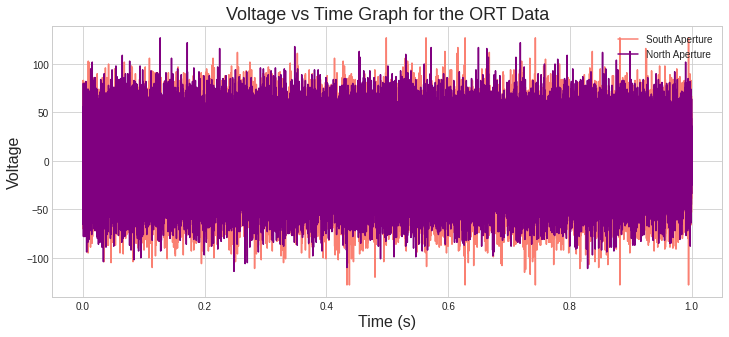

In [41]:

fig, ax = plt.subplots(figsize=(12,5))

ax.set(xlabel="Time (s)",
       ylabel="Voltage");
axes = plt.gca()
axes.xaxis.label.set_size(16)
axes.yaxis.label.set_size(16)
plt.title("Voltage vs Time Graph for the ORT Data",
          fontsize = 18)
plt.plot(volts.Time, volts.AS, color="salmon")
plt.plot(volts.Time, volts.AN, color="purple")

plt.legend(("South Aperture", "North Aperture"), loc='upper right', shadow=True, fancybox=True);  

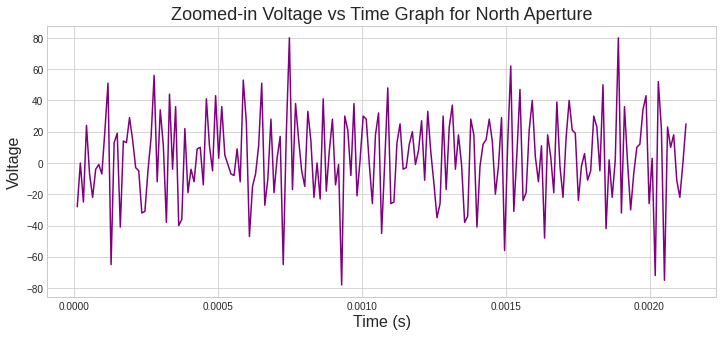

In [40]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel="Time (s)",
       ylabel="Voltage");
axes = plt.gca()
axes.xaxis.label.set_size(16)
axes.yaxis.label.set_size(16)
plt.title("Zoomed-in Voltage vs Time Graph for North Aperture",
          fontsize = 18)
plt.plot(volts.iloc[1:200].Time, volts.iloc[1:200].AN, color="purple");

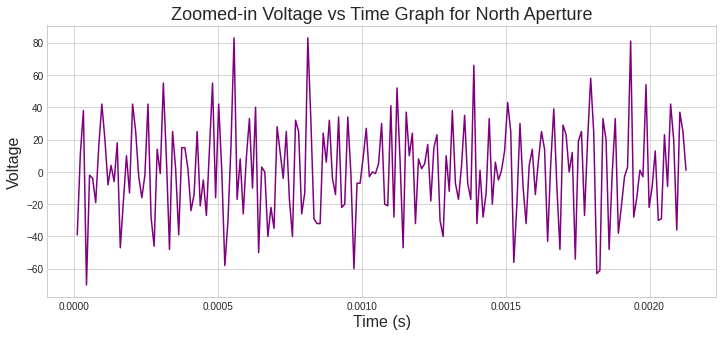

In [39]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel="Time (s)",
       ylabel="Voltage");
axes = plt.gca()
axes.xaxis.label.set_size(16)
axes.yaxis.label.set_size(16)
plt.title("Zoomed-in Voltage vs Time Graph for North Aperture",
          fontsize = 18)
plt.plot(volts.iloc[1:200].Time, volts.iloc[1:200].AS, color="purple");

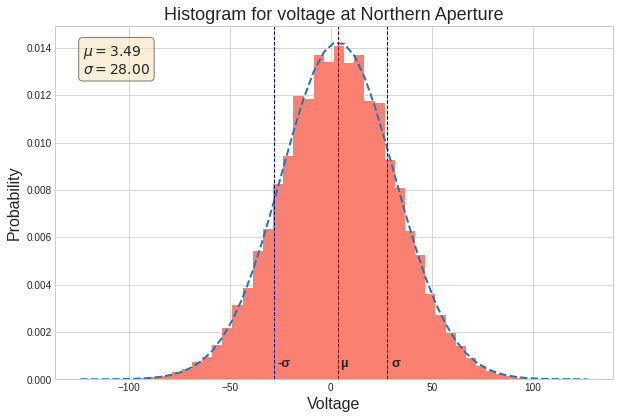

In [106]:
#@title
fig, ax = plt.subplots(figsize=(10,6.5))

mu = np.mean(volts.AN)
sigma = np.std(volts.AN)

ax.set(xlabel="Voltage",
       ylabel="Probability");
axes = plt.gca()
axes.xaxis.label.set_size(16)
axes.yaxis.label.set_size(16)
n, bins, patches = plt.hist(volts.AN, color="salmon", bins=50, density=True)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.title("Histogram for voltage at Northern Aperture",
          fontsize = 18)
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu, ),
    r'$\sigma=%.2f$' % (sigma, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax.plot(bins, y, '--', linewidth=2.0)


plt.axvline(mu, color='maroon', linestyle='dashed', linewidth=1)
plt.axvline(sigma, color='darkblue', linestyle='dashed', linewidth=1)
plt.axvline(-sigma, color='darkblue', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(mu*1.3, max_ylim*0.035, 'µ', fontweight='bold', fontsize=13)
plt.text(sigma*1.07, max_ylim*0.035, 'σ', fontweight='bold', fontsize=13)
plt.text(-sigma*0.95, max_ylim*0.035, '-σ', fontweight='bold', fontsize=13);

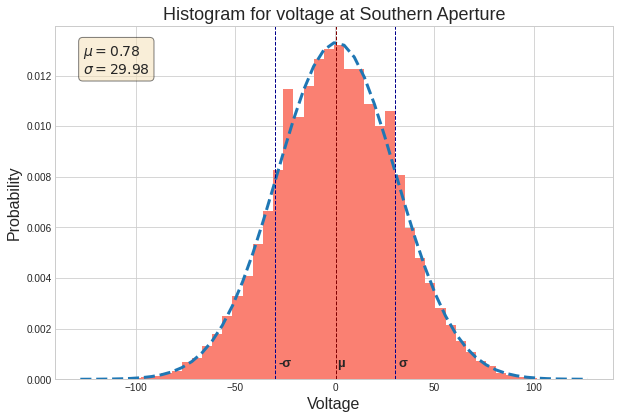

In [105]:

fig, ax = plt.subplots(figsize=(10, 6.5))

mu = np.mean(volts.AS)
sigma = np.std(volts.AS)

ax.set(xlabel="Voltage",
       ylabel="Probability");
axes = plt.gca()
axes.xaxis.label.set_size(16)
axes.yaxis.label.set_size(16)
n, bins, patches = plt.hist(volts.AS, color="salmon", bins=50, density=True)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--', linewidth=3.0);

plt.title("Histogram for voltage at Southern Aperture",
          fontsize = 18)

textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu, ),
    r'$\sigma=%.2f$' % (sigma, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.axvline(mu, color='maroon', linestyle='dashed', linewidth=1)
plt.axvline(sigma, color='darkblue', linestyle='dashed', linewidth=1)
plt.axvline(-sigma, color='darkblue', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(mu*1.35, max_ylim*0.035, 'µ', fontweight='bold', fontsize=13)
plt.text(sigma*1.07, max_ylim*0.035, 'σ', fontweight='bold', fontsize=13)
plt.text(-sigma*0.95, max_ylim*0.035, '-σ', fontweight='bold', fontsize=13);


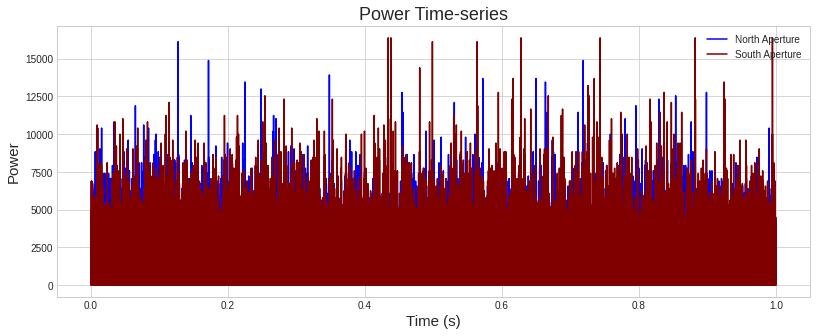

In [37]:
fig, ax = plt.subplots(figsize=(13.5,5))
power_n = np.square(volts.AN)
power_s = np.square(volts.AS)
ax.set(xlabel="Time (s)",
       ylabel="Power");
plt.title("Power Time-series",
          fontsize = 18)
axes = plt.gca()
axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15)
plt.plot(volts.Time, power_n, color="blue")
plt.plot(volts.Time, power_s, color="maroon")
ax.legend(('North Aperture', 'South Aperture'), loc='upper right', shadow=True);

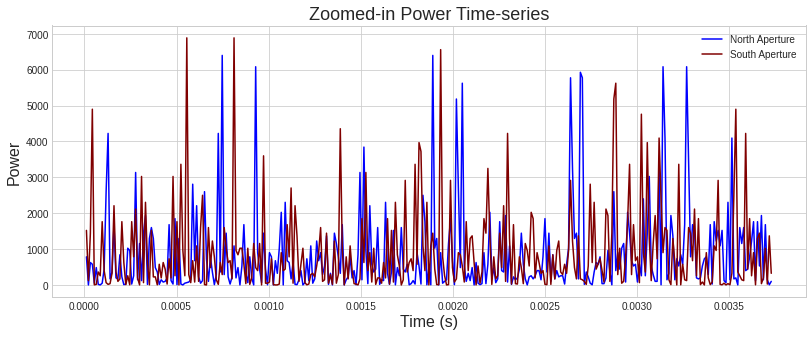

In [38]:
fig, ax = plt.subplots(figsize=(13.5,5))
power_n = np.square(volts.AN)
power_s = np.square(volts.AS)
ax.set(xlabel="Time (s)",
       ylabel="Power");
plt.title("Zoomed-in Power Time-series",
          fontsize = 18)
axes = plt.gca()
axes.xaxis.label.set_size(16)
axes.yaxis.label.set_size(16)
plt.plot(volts.iloc[1:350].Time, power_n.iloc[1:350], color="blue")
plt.plot(volts.iloc[1:350].Time, power_s.iloc[1:350], color="maroon")
ax.legend(('North Aperture', 'South Aperture'), loc='upper right', shadow=True);

In [123]:
mean_pn = np.round(np.mean(np.square(volts.AN)))
std_pn = np.round(np.std(np.square(volts.AN)))
mean_ps = np.round(np.mean(np.square(volts.AS)))
std_ps = np.round(np.std(np.square(volts.AS)))

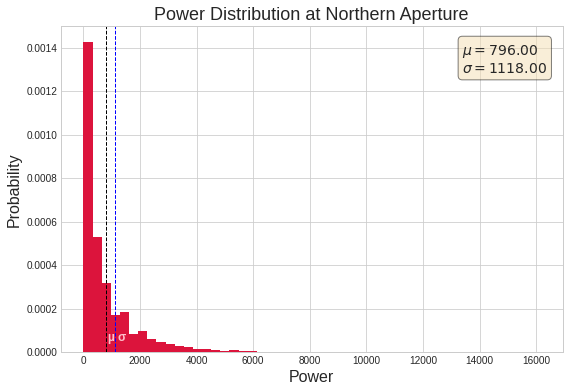

In [122]:
from scipy.stats import expon
fig, ax = plt.subplots(figsize=(9, 6))

ax.set(xlabel="Power",
       ylabel="Probability");
axes = plt.gca()
axes.xaxis.label.set_size(16)
axes.yaxis.label.set_size(16)
n, bins, patches = plt.hist(np.square(volts.AN), color="crimson", bins=50, density=True)
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mean_pn, ),
    r'$\sigma=%.2f$' % (std_pn, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax.text(0.80, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', horizontalalignment='left', bbox=props)
plt.title("Power Distribution at Northern Aperture",
          fontsize = 18)

plt.axvline(mean_pn, color='k', linestyle='dashed', linewidth=1)
plt.axvline(std_pn, color='blue', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(mean_pn*1.07, max_ylim*0.035, 'µ', fontweight='bold', fontsize=12, color='pink')
plt.text(std_pn*1.07, max_ylim*0.035, 'σ', fontweight='bold', fontsize=12, color='pink');


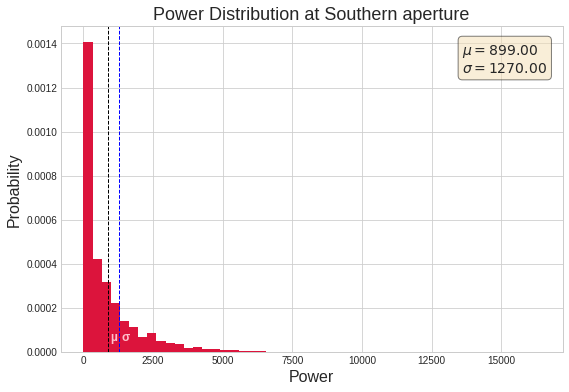

In [120]:
fig, ax = plt.subplots(figsize=(9, 6))

ax.set(xlabel="Power",
       ylabel="Probability");
axes = plt.gca()
axes.xaxis.label.set_size(16)
axes.yaxis.label.set_size(16)
plt.hist(np.square(volts.AS), color="crimson", bins=50, density=True)
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mean_ps, ),
    r'$\sigma=%.2f$' % (std_ps, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax.text(0.80, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', horizontalalignment='left', bbox=props)
plt.title("Power Distribution at Southern aperture",
          fontsize = 18)

plt.axvline(mean_ps, color='k', linestyle='dashed', linewidth=1)
plt.axvline(std_ps, color='blue', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(mean_ps*1.07, max_ylim*0.035, 'µ', fontweight='bold', fontsize=12, color='pink')
plt.text(std_ps*1.07, max_ylim*0.035, 'σ', fontweight='bold', fontsize=12, color='pink');

In [166]:
ps= np.fft.fft(volts.AN, n=256, axis=- 1, norm=None)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


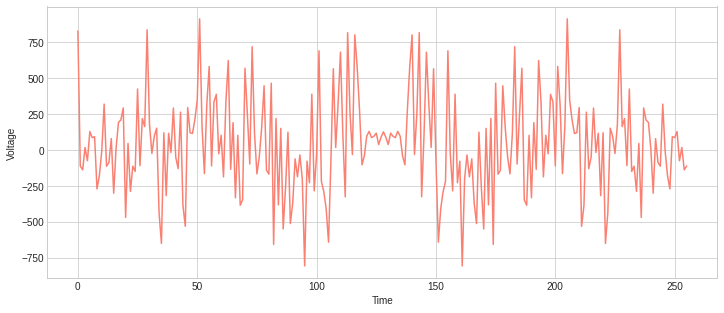

In [167]:
fig, ax = plt.subplots(figsize=(12,5))
ax.set(xlabel="Time",
       ylabel="Voltage");
plt.plot(ps, color="salmon"); 